In [1]:
### https://blog.csdn.net/Mind_programmonkey/article/details/104888356

In [2]:
import os
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.models import Sequential
from scipy.io import wavfile as wav
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
import struct
import matplotlib.pyplot as plt
import IPython.display as ipd
import progressbar
#from tkinter import ttk

import time
#import import_data as dc # a local module

In [3]:
data = pd.read_csv('metadata/Screamsound.csv')
valid_data = data[['slice_file_name', 'fold' ,'classID', 'class']][ data['end']-data['start'] > 0 ]
valid_data['path'] = 'fold' + valid_data['fold'].astype('str') + '/' + valid_data['slice_file_name'].astype('str')


In [4]:
# 查看前5行的信息
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100652-3-0-0.wav,100652,0.0,4.0,1,2,1,dog_bark
1,100652-3-0-1.wav,100652,0.5,4.5,1,2,1,dog_bark
2,100652-3-0-2.wav,100652,1.0,5.0,1,2,1,dog_bark
3,100652-3-0-3.wav,100652,1.5,5.5,1,2,1,dog_bark
4,101415-3-0-2.wav,101415,1.0,5.0,1,2,1,dog_bark


In [5]:
#查看各个文件夹中的声音分布情况
appended = []
for i in range(1,3):
    appended.append(data[data.fold == i]['class'].value_counts())
    
class_distribution = pd.DataFrame(appended)
class_distribution = class_distribution.reset_index()
class_distribution['index'] = ["fold"+str(x) for x in range(1,3)]
class_distribution

,index,scream,dog_bark
0,fold1,15.0,NaN
1,fold2,NaN,7.0


In [6]:
# 读取wav文件函数
def path_class(filename):
    excerpt = data[data['slice_file_name'] == filename]
    path_name = os.path.join('audio', 'fold'+str(excerpt.fold.values[0]), filename)
    return path_name, excerpt['class'].values[0]


In [7]:

# 绘图wav函数
def wav_plotter(full_path, class_label):   
    rate, wav_sample = wav.read(full_path)
    wave_file = open(full_path,"rb")
    riff_fmt = wave_file.read(36)
    bit_depth_string = riff_fmt[-2:]
    bit_depth = struct.unpack("H",bit_depth_string)[0]
    print('sampling rate: ',rate,'Hz')
    print('bit depth: ',bit_depth)
    print('number of channels: ',wav_sample.shape[1])
    print('duration: ',wav_sample.shape[0]/rate,' second')
    print('number of samples: ',len(wav_sample))
    print('class: ',class_label)
    plt.figure(figsize=(12, 4))
    plt.plot(wav_sample) 
    return ipd.Audio(full_path)


sampling rate:  44100 Hz
bit depth:  16
number of channels:  2
duration:  3.7616326530612243  second
number of samples:  165888
class:  scream


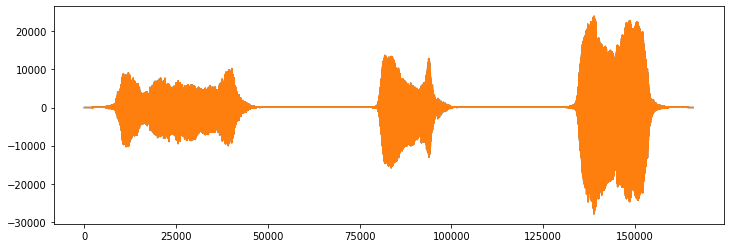

In [8]:
# 举个声音的例子进行展示
fullpath, label = path_class('yisell_sound_2007_12_18_15_27_543156.wav')
wav_plotter(fullpath,label)


In [78]:
from numpy import *
# 读取wav声音文件，并提取器mfcc特征，以及label标签，将其保存
bar = progressbar.ProgressBar(maxval=data.shape[0], widgets=[progressbar.Bar('$', '||', '||'), ' ', progressbar.Percentage()])
bar.start()

dataset = []

for i in range(data.shape[0]):
    
    fullpath, class_id = path_class(data.slice_file_name[i])
    try:
        X, sample_rate = librosa.load(fullpath, res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    except Exception:
        print("Error encountered while parsing file: ", file)
        mfccs, class_id = None, None
    feature = mfccs
    label = class_id
    
    #dataset[i,0], dataset[i,1] = feature, label
    dataset.append([feature, label])
    
    bar.update(i+1)

    
print(dataset)
print(type(dataset))


[[array([-2.76074005e+02,  1.01702332e+02, -9.09617081e+01, -4.58845758e+00,
       -1.91535026e-01, -1.27734118e+01, -1.72550297e+01,  3.26614213e+00,
       -9.61936474e+00,  1.53714705e+01,  8.93650055e+00,  1.23601656e+01,
        1.45476198e+00,  2.06550193e+00, -6.15444422e+00,  2.80930114e+00,
        3.33138108e+00,  1.68819785e+00, -1.29912674e+00,  8.02487850e+00,
        6.12269640e+00,  1.19570926e-01,  5.47339725e+00, -1.02392741e-01,
       -1.36843956e+00,  4.32706308e+00,  5.81786871e-01,  2.44431996e+00,
        2.54816842e+00,  6.51461482e-01,  4.73611259e+00,  1.25436807e+00,
       -1.09259188e+00,  6.34501219e-01,  1.84880817e+00,  1.79349935e+00,
        2.03636026e+00,  9.41113383e-02,  2.66597056e+00,  8.53925765e-01],
      dtype=float32), 'dog_bark'], [array([-2.94434937e+02,  1.04256752e+02, -9.82002563e+01, -8.72809029e+00,
        3.98803878e+00, -1.55847321e+01, -1.88724880e+01,  1.22523463e+00,
       -1.05727444e+01,  1.24330664e+01,  9.72086811e+00,  1.

NameError: name 'history' is not defined

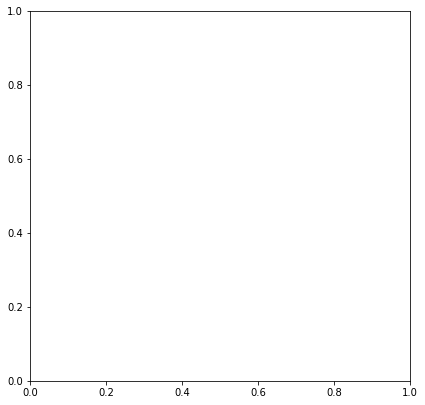

In [77]:
from matplotlib import pyplot as plt
# 图示训练过程
net = -1
name_title = ['Loss','Accuracy']
fig=plt.figure(figsize=(64,64))
for i in range(0,2):
    ax=fig.add_subplot(8,8,i+1)
    plt.plot(history[net].history[list(history[net].history.keys())[i]], label = list(history[net].history.keys())[i] )
    plt.plot(history[net].history[list(history[net].history.keys())[i+2]],label = list(history[net].history.keys())[i+2] )
    plt.xlabel('Epochs', fontsize=18)
    plt.ylabel(name_title[i], fontsize=18)
    plt.legend()
    plt.show()
